In [89]:
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
# store map size (pixels)
STORE_SIZE = [3136, 2475]

# re-id area size
RE_ID_ORIGIN_POINT = [1080, 1280]
RE_ID_AREA = [355, 690]

# Enter and exit defined areas
# BL - Bottom Left / R - Right / T - Top / TL - Top Left
ENTER_EXIT_AREAS = {"BL":[1075, 1250, 1150, 1325], "R":[1400, 1250, 1435, 1965], "T":[1205, 1985, 1435, 1970], "TL":[1075, 1825, 1205, 1970]}

TRAJECTORY_DATA_PATH = "results/trajectories/transformed_coords.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"

In [91]:
def get_data_reid_area(df):
    df_filtered = df[(df["x_floorplan_new"] >= RE_ID_ORIGIN_POINT[0]) & 
                     (df["x_floorplan_new"] <= RE_ID_ORIGIN_POINT[0] + RE_ID_AREA[0]) & 
                     (df["y_floorplan_new"] >= RE_ID_ORIGIN_POINT[1]) & 
                     (df["y_floorplan_new"] <= RE_ID_ORIGIN_POINT[1] + RE_ID_AREA[1])]
    return df_filtered


def get_last_customer_points(df):
    for customer in df.customer_id_global.unique():
        all_except_last = df.loc[df["customer_id_global"] == customer].sort_values(by='time').iloc[:-1].index
        df.drop(all_except_last, inplace=True)
    return df


def get_first_customer_points(df):
    for customer in df.customer_id_global.unique():
        all_except_first = df.loc[df["customer_id_global"] == customer].sort_values(by='time').iloc[0:].index
        df.drop(all_except_first, inplace=True)
    return df


def re_id_customers():
    


def print_trajectory(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])
    plt.scatter(df["x_floorplan_new"], df["y_floorplan_new"], marker=".", s=1, lw=0, color="blue")

C:\Users\diogo\AppData\Local\Temp\ipykernel_13268\2160585658.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(all_except_last, inplace=True)


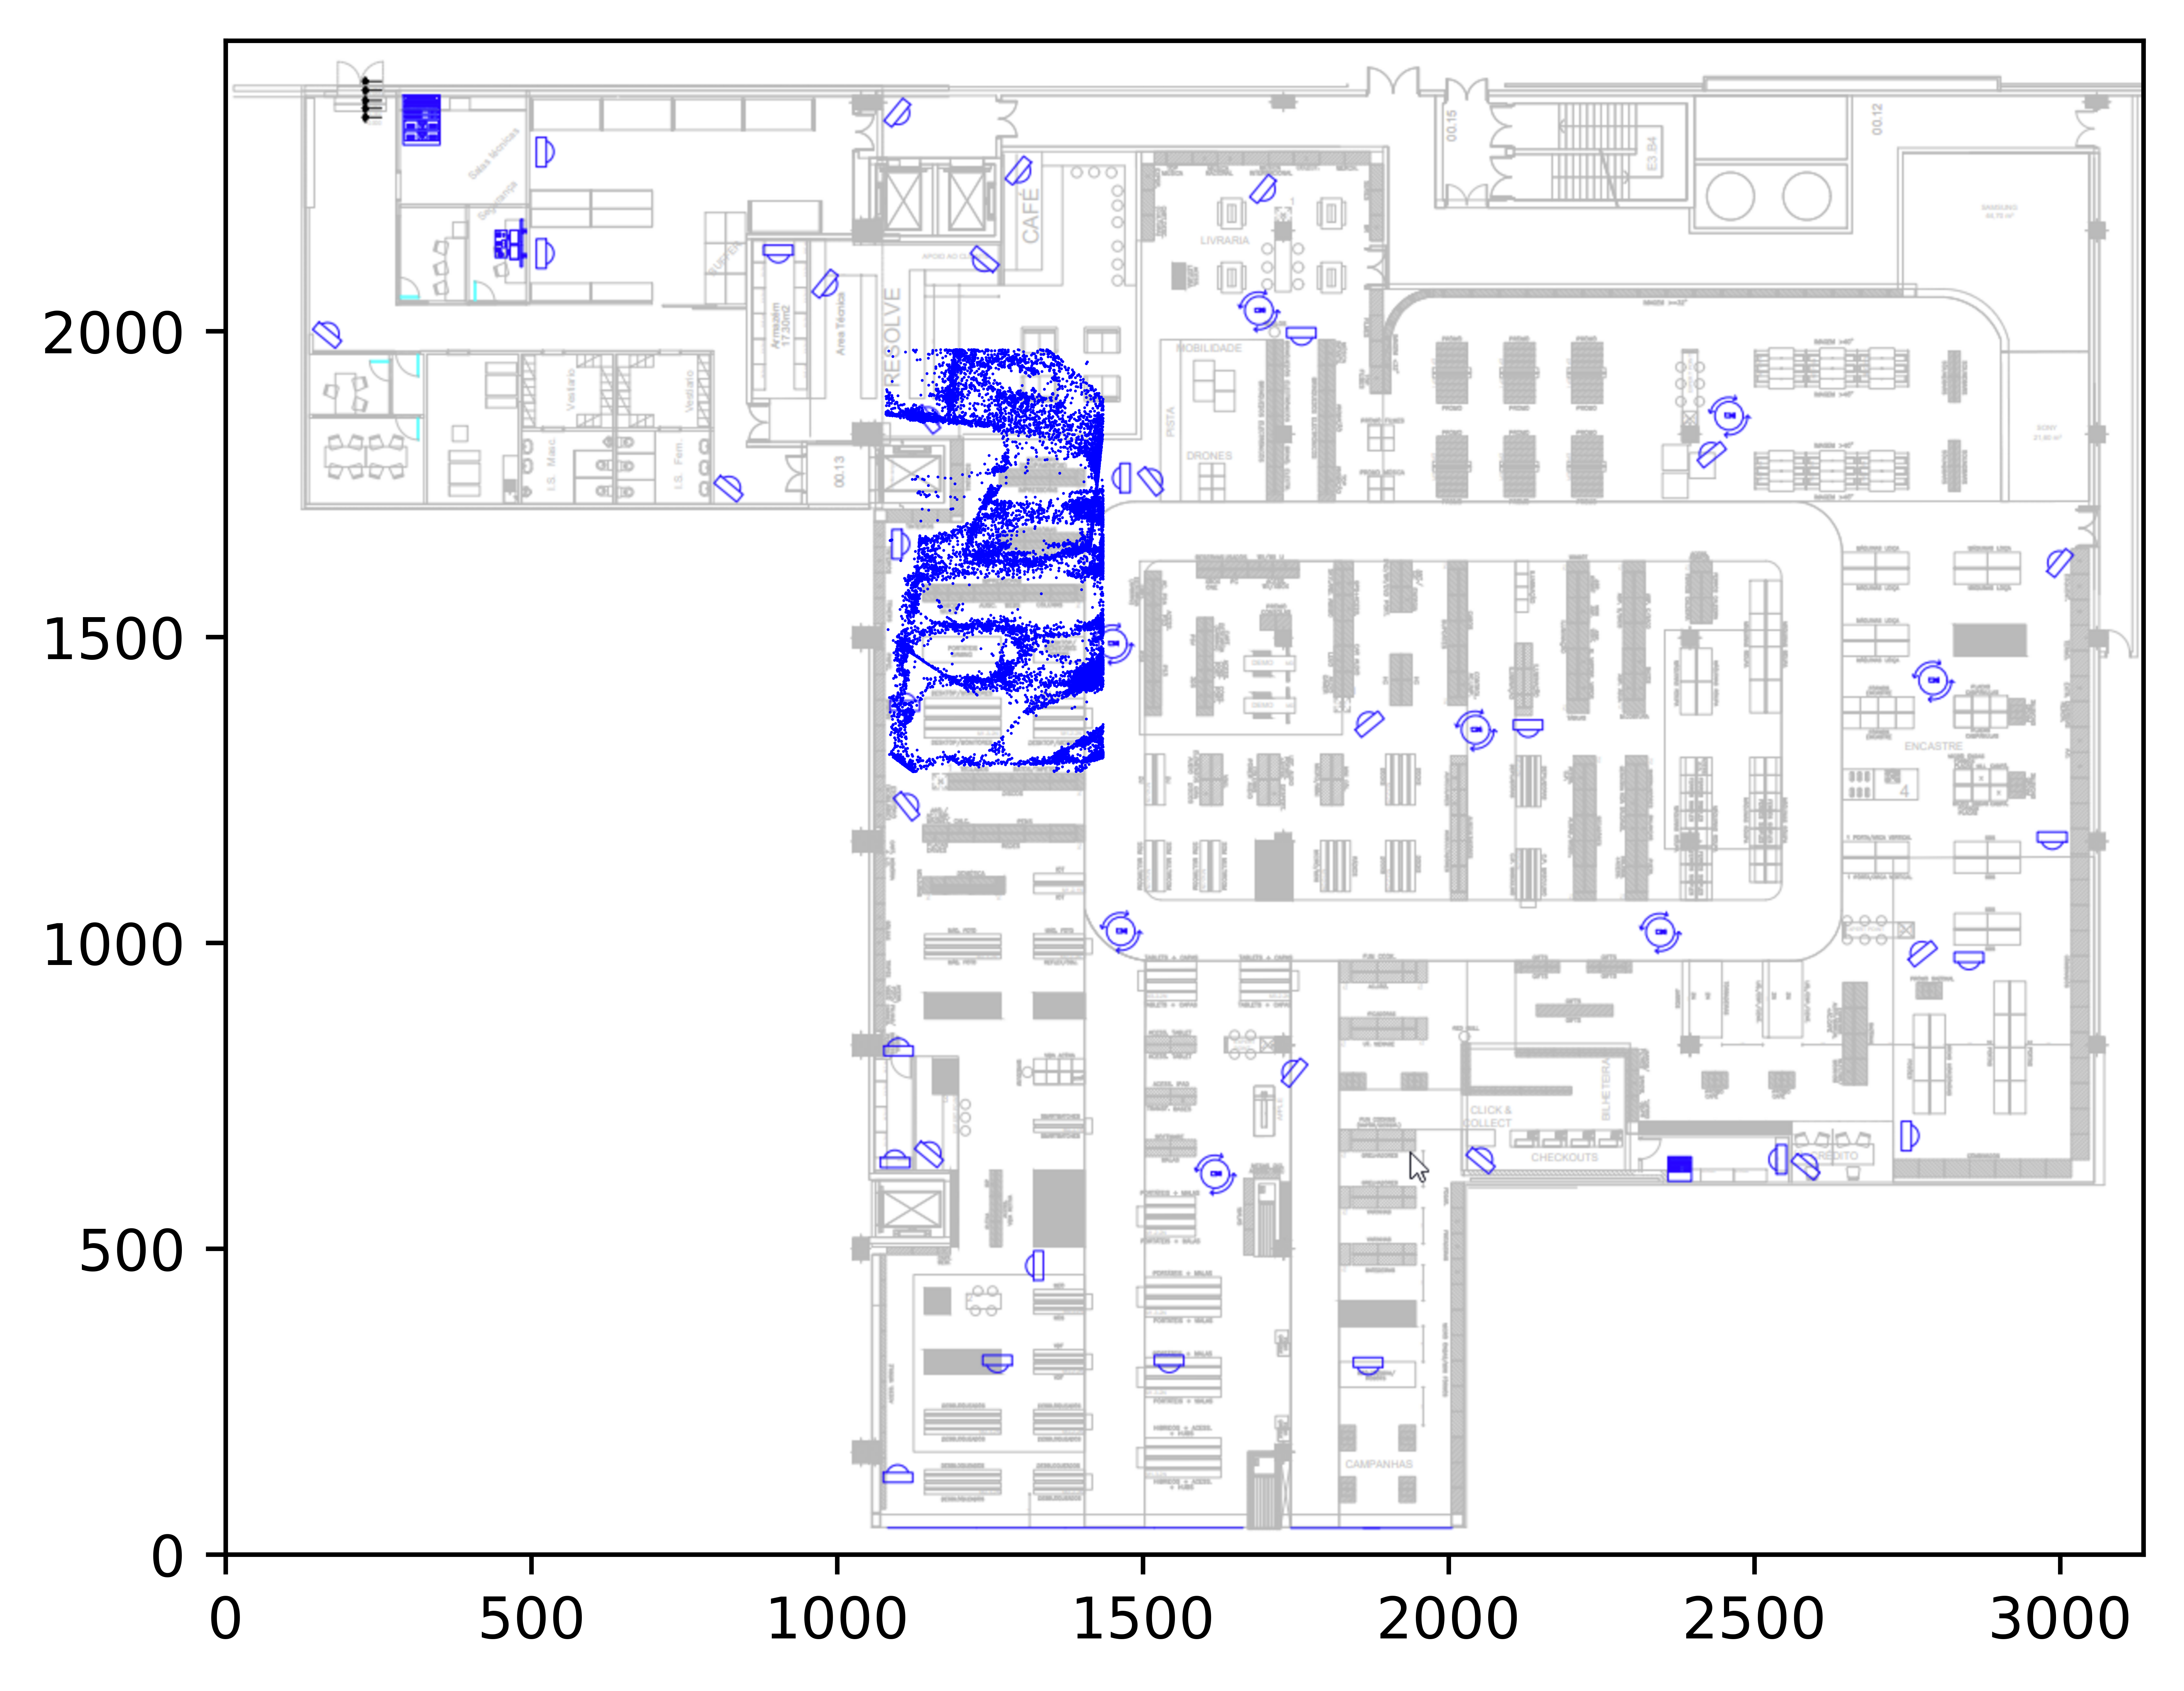

In [92]:
df = pd.read_csv(TRAJECTORY_DATA_PATH, low_memory=False, index_col=None, header=0)
df_filtered = get_data_reid_area(df)
last_customer_points = get_last_customer_points(df_filtered)
#df_filtered.to_csv("results/trajectories/data_reid_area.csv", index=False)
print_trajectory(last_customer_points)